In [95]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import warnings
import seaborn as sns
sns.set_style('ticks')

py.offline.init_notebook_mode(connected = True)
warnings.filterwarnings('ignore')

# Baseline Data

In [3]:
# reading the data
df = pd.read_excel("EWLI_RawData.xlsx")

In [4]:
df.head()

,start,end,today,Intro,City,Enumerator,enumj_id,loc_herat,loc_jbad,a_basics/a01,...,_uuid,_submission_time,_index,_parent_table_name,_parent_index,_tags,_notes,_version,_duration,_submitted_by
0,2015-04-06T10:18:51.698+04:30,2015-04-06T16:57:23.812+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,male,...,a8917c45-cbfa-48fb-8479-afae832fa4f7,2015-04-06T12:54:51,2,NaN,-1,NaN,NaN,201504010942,23912.0,NaN
1,2015-04-06T10:37:05.429+04:30,2015-04-06T16:59:10.999+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,...,d8645deb-e55e-4baf-896e-261788079da8,2015-04-06T12:54:56,3,NaN,-1,NaN,NaN,201504010942,22925.0,NaN
2,2015-04-06T10:57:02.577+04:30,2015-04-06T16:59:58.126+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,...,456cfefd-0cc6-41d3-8fa4-5c95ca57cfd1,2015-04-06T12:55:01,4,NaN,-1,NaN,NaN,201504010942,21776.0,NaN
3,2015-04-06T11:18:34.904+04:30,2015-04-06T17:02:29.899+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,...,a122c9d2-e7ab-4b7e-835c-7d667769393f,2015-04-06T12:55:05,5,NaN,-1,NaN,NaN,201504010942,20635.0,NaN
4,2015-04-06T11:33:24.533+04:30,2015-04-06T17:01:38.354+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,...,5e16da4c-ed63-4c26-b17f-3a64b2409a8c,2015-04-06T12:55:10,6,NaN,-1,NaN,NaN,201504010942,19694.0,NaN


# Part 1: Splitting the dataframe into categories (Subsets)

### Category 1 : basics and household composition

In [5]:
start_index = df.columns.get_loc("a_basics/a01")
end_index = df.columns.get_loc("a_hh")
df_basics_hh = df[df.columns[start_index: end_index]] 

In [6]:
# sub-dataframe for basics and hosehold data
df_basics_hh.head()

,a_basics/a01,a_basics/a02,a_basics/a03,a_basics/a03_other,b_hh/b01a,b_hh/b01b,b02a,b02b,b03a,/b03b,...,b06a,b06b,hh_male,hh_female,hh_total,hh_eligbilefem,hh_girls,hh_boys,hh_lit_female,hh_lit_male
0,male,married living with spouse,tajik,NaN,0,0,0,0,1,2,...,2.0,3,4,3,7,3,1,2,3,4
1,female,married living with spouse,hazara,NaN,0,0,0,0,0,0,...,2.0,0,2,3,5,3,0,0,3,2
2,female,married living with spouse,pashtun,NaN,0,0,0,0,0,4,...,3.0,5,10,7,17,7,0,4,7,10
3,female,widow,tajik,NaN,0,0,0,0,0,0,...,2.0,1,4,5,9,4,0,0,5,4
4,female,married living with spouse,tajik,NaN,0,0,0,1,2,0,...,4.0,2,4,4,8,4,2,1,4,3


### Category 2 : Origin


In [7]:
start_index = df.columns.get_loc("c_origin/c01")
end_index = df.columns.get_loc("c_origin/c06_other")
df_origin = df[df.columns[start_index: end_index]] 

In [8]:
df_origin.head()

,c_origin/c01,c_origin/c01aa,c_origin/c01ab,c_origin/c01ab_other,c_origin/c01ac,c_origin/c01ac_other,c_origin/c02pre,c_origin/c02pre_other,c_origin/c02,c_origin/c03,...,c_origin/c05,c_origin/c05_other,c_origin/c06,c_origin/c06/why_insecurity,c_origin/c06/why_persecution,c_origin/c06/why_livelihoods,c_origin/c06/why_shelter,c_origin/c06/why_land,c_origin/c06/why_services,c_origin/c06/other
0,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,zendahjan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Category 3 : Displacement

In [9]:
start_index = df.columns.get_loc("d_idps/d01")
end_index = df.columns.get_loc("d_idps/d08_other")
df_displacement = df[df.columns[start_index: end_index]] 

In [10]:
df_displacement.head()

,d_idps/d01,d_idps/d01/dis_armed,d_idps/d01/dis_military,d_idps/d01/dis_intimidation,d_idps/d01/dis_tribal,d_idps/d01/dis_land,d_idps/d01/dis_feud,d_idps/d01/dis_mines,d_idps/d01/dis_shelling,d_idps/d01/dis_naturaldis,...,d_idps/d06/rr_assistance,d_idps/d07,d_idps/d08,d_idps/d08/inte_land,d_idps/d08/inte_school,d_idps/d08/inte_job,d_idps/d08/inte_serivces,d_idps/d08/inte_hostile,d_idps/d08/inte_gov,d_idps/d08/other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Category 4 : Food access


In [11]:
start_index = df.columns.get_loc("e_food/e_fcs/e_fcs_intro")
end_index = df.columns.get_loc("e_food/e35_other")
df_food = df[df.columns[start_index: end_index]] 

In [12]:
df_food.head()

,e_food/e_fcs/e_fcs_intro,e_food/e_fcs/e01,e_food/e_fcs/e02,e_food/e_fcs/e03,e_food/e_fcs/e04,e_food/e_fcs/e05,e_food/e_fcs/e06,e_food/e_fcs/e07,e_food/e_fcs/e08,e_food/e_fcs/e09,...,e_food/e_hfias/e32a,e_food/e_hfias/e33,e_food/e_hfias/e33a,e_food/e34,e_food/e34_other,e_food/e35,e_food/e35/food_taste,e_food/e35/food_price,e_food/e35/food_health,e_food/e35/other
0,NaN,7,7,5,4,3,3,7,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_taste food_price,True,True,False,False
1,NaN,7,3,4,7,3,4,6,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_taste food_price,True,True,False,False
2,NaN,7,3,5,0,2,0,6,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_price,False,True,False,False
3,NaN,7,2,2,0,1,3,4,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_price,False,True,False,False
4,NaN,7,2,3,0,0,0,0,7,7,...,3,1,3,dec_femalehh,NaN,food_price,False,True,False,False


### Category 5 : Access to Basic Services


In [13]:
start_index = df.columns.get_loc("f_access/f_lit/f01a")
end_index = df.columns.get_loc("f_access/f11_other")
df_basic_services = df[df.columns[start_index: end_index]] 

In [14]:
df_basic_services.head()

,f_access/f_lit/f01a,f_access/f_lit/f01b,f_access/f_lit/f01a1,f_access/f_lit/f01a1/ill_noschoolg,f_access/f_lit/f01a1/ill_fam,f_access/f_lit/f01a1/ill_money,f_access/f_lit/f01a1/ill_far,f_access/f_lit/f01a1/ill_workh,f_access/f_lit/f01a1/ill_workinc,f_access/f_lit/f01a1/ill_language,...,f_access/f11/hissue_lack,f_access/f11/hissue_long,f_access/f11/hissue_cost,f_access/f11/hissue_qualified,f_access/f11/hissue_med,f_access/f11/hissue_femdoc,f_access/f11/hissue_femnurse,f_access/f11/hissue_all,f_access/f11/hissue_none,f_access/f11/other
0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
1,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,True,True,False,False,True,False,False,False
2,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,True,False,False,False,False,False
3,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
4,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False


### Category 6 : Social Safety Nets


In [15]:
## This category has only 1 column
#start_index = df.columns.get_loc("g_social/g01")
#end_index = df.columns.get_loc("c_origin/c06_other")
#df_origin = df[df.columns[start_index: end_index]] 

### Category 7 : Assets


In [15]:
start_index = df.columns.get_loc("h_assets/h01")
end_index = df.columns.get_loc("h_assets/h23")
df_assets = df[df.columns[start_index: end_index]] 

In [16]:
df_assets.head()

,h_assets/h01,h_assets/h01_other,h_assets/h01a,h_assets/h02,h_assets/h03,h_assets/h03_other,h_assets/h04,h_assets/h04/livestock_cattle,h_assets/h04/livestock_buffalo,h_assets/h04/livestock_horse,...,h_assets/h_dai/h13,h_assets/h_dai/h14,h_assets/h_dai/h15,h_assets/h_dai/h16,h_assets/h_dai/h17,h_assets/h18,h_assets/h19,h_assets/h20,h_assets/h21,h_assets/h22
0,shelter_own,NaN,40,yes,deed_formal,NaN,livestock_none,False,False,False,...,yes,yes,yes,yes,no,yes,yes,no,no,yes
1,shelter_own,NaN,30,no,NaN,NaN,livestock_none,False,False,False,...,yes,no,no,no,no,yes,yes,no,no,no
2,shelter_own,NaN,30,no,NaN,NaN,livestock_none,False,False,False,...,yes,yes,yes,yes,no,yes,yes,no,no,no
3,shelter_house,NaN,20,no,NaN,NaN,livestock_none,False,False,False,...,no,no,no,no,no,yes,no,no,no,no
4,shelter_own,NaN,20,no,NaN,NaN,livestock_none,False,False,False,...,yes,no,no,no,no,yes,yes,no,no,yes


### Category 8 : Adaptive capacity


In [17]:
start_index = df.columns.get_loc("i_adaptive/i01")
end_index = df.columns.get_loc("i_adaptive/i12_other")
df_adaptive_capacity = df[df.columns[start_index: end_index]] 

In [18]:
df_adaptive_capacity.head()

,i_adaptive/i01,i_adaptive/i01income_count,i_adaptive/i04,i_adaptive/i05,i_adaptive/i05a,i_adaptive/i05a1,i_adaptive/i05a1/school_work,i_adaptive/i05a1/school_document,i_adaptive/i05a1/school_far,i_adaptive/i05a1/school_ill,...,i_adaptive/i11/vul_ochildren,i_adaptive/i11/other,i_adaptive/i11_other,i_adaptive/i12,i_adaptive/i12/a_food,i_adaptive/i12/a_nfi,i_adaptive/i12/a_health,i_adaptive/i12/a_housing,i_adaptive/i12/a_legal,i_adaptive/i12/other
0,2,2,8000,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,No option,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,3000,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,No object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,7000,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,No option,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4000,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,No option,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,3000,no,3.0,NaN,NaN,NaN,NaN,NaN,...,False,True,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Category 9 : Stereotypes


In [118]:
#slicing stereotypes section from main dataframe
df_stereotypes = df.loc[:, 'j_stereotypes/j01':'j_stereotypes/j0/stigma_thieves']

In [115]:
df_stereotypes.head()

,j_stereotypes/j01,j_stereotypes/j02,j_stereotypes/j02/source_own,j_stereotypes/j02/source_fam,j_stereotypes/j02/source_neigh,j_stereotypes/j02/source_elders,j_stereotypes/j02/source_officials,j_stereotypes/j02/source_radio,j_stereotypes/j02/source_tv,j_stereotypes/j02/source_paper,...,j_stereotypes/j03/source_tv,j_stereotypes/j03/source_paper,j_stereotypes/j03/source_internet,j_stereotypes/j03/other,j_stereotypes/j03_other,j_stereotypes/j0,j_stereotypes/j0/stigma_pasht,j_stereotypes/j0/stigma_taliban,j_stereotypes/j0/stigma_same,j_stereotypes/j0/stigma_thieves
0,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0,0.0
1,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0,0.0
2,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,No information,stigma_same,0.0,0.0,1.0,0.0
3,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0,0.0
4,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0,0.0


### Category 10: Interest to participate in the program

In [116]:
#slicing interest section from main dataframe
df_interest = df.loc[:, 'k_interest/k01':'k_interest/k_participate/k05/ben_men'] 

In [117]:
df_interest.head()

,k_interest/k01,k_interest/k_participate/k_note,k_interest/k_participate/k_label,k_interest/k_participate/k_label/ben_women,k_interest/k_participate/k_label/ben_men,k_interest/k_participate/k02,k_interest/k_participate/k02/ben_women,k_interest/k_participate/k02/ben_men,k_interest/k_participate/k03,k_interest/k_participate/k03/ben_women,k_interest/k_participate/k03/ben_men,k_interest/k_participate/k04,k_interest/k_participate/k04/ben_women,k_interest/k_participate/k04/ben_men,k_interest/k_participate/k05,k_interest/k_participate/k05/ben_women,k_interest/k_participate/k05/ben_men
0,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_men,0.0,1.0
1,yes,NaN,NaN,NaN,NaN,ben_women,1.0,0.0,NaN,NaN,NaN,ben_women,1.0,0.0,ben_women,1.0,0.0
2,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0
3,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0
4,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0


# Part 2: Deep dive in each category 

## I. Basic and Household Composition information

In [24]:
df_basics_hh.head()

,a_basics/a01,a_basics/a02,a_basics/a03,a_basics/a03_other,b_hh/b01a,b_hh/b01b,b02a,b02b,b03a,/b03b,...,b06a,b06b,hh_male,hh_female,hh_total,hh_eligbilefem,hh_girls,hh_boys,hh_lit_female,hh_lit_male
0,male,married living with spouse,tajik,NaN,0,0,0,0,1,2,...,2.0,3,4,3,7,3,1,2,3,4
1,female,married living with spouse,hazara,NaN,0,0,0,0,0,0,...,2.0,0,2,3,5,3,0,0,3,2
2,female,married living with spouse,pashtun,NaN,0,0,0,0,0,4,...,3.0,5,10,7,17,7,0,4,7,10
3,female,widow,tajik,NaN,0,0,0,0,0,0,...,2.0,1,4,5,9,4,0,0,5,4
4,female,married living with spouse,tajik,NaN,0,0,0,1,2,0,...,4.0,2,4,4,8,4,2,1,4,3


In [66]:
x = np.linspace(0, np.pi, 300)

layout = go.Layout(
    title='<b>Distribution of Age</b>',
    yaxis=dict(
        title='<i>Count</i>'
    ),
    xaxis=dict(
        title='<i>Age range</i>'
    ),
    
    barmode='stack'
)


f1_h = df_basics_hh[df_basics_hh['city']=='herat']['b_hh/b01a'].sum()
f2_h = df_basics_hh[df_basics_hh['city']=='herat']['b02a'].sum()
f3_h = df_basics_hh[df_basics_hh['city']=='herat']['b03a'].sum()
f4_h = df_basics_hh[df_basics_hh['city']=='herat']['b04a'].sum()
f5_h = df_basics_hh[df_basics_hh['city']=='herat']['b05a'].sum()

m1_h = df_basics_hh[df_basics_hh['city']=='herat']['b_hh/b01b'].sum()
m2_h = df_basics_hh[df_basics_hh['city']=='herat']['b02b'].sum()
m3_h = df_basics_hh[df_basics_hh['city']=='herat']['/b03b'].sum()
m4_h = df_basics_hh[df_basics_hh['city']=='herat']['b04b'].sum()
m5_h = df_basics_hh[df_basics_hh['city']=='herat']['b05b'].sum()

f1_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b_hh/b01a'].sum()
f2_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b02a'].sum()
f3_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b03a'].sum()
f4_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b04a'].sum()
f5_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b05a'].sum()

m1_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b_hh/b01b'].sum()
m2_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b02b'].sum()
m3_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['/b03b'].sum()
m4_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b04b'].sum()
m5_j = df_basics_hh[df_basics_hh['city']=='jalalabad']['b05b'].sum()

trace1 = go.Bar(
    x=['0-4 Herat', '0-4 Jalalabad', '5-11 Herat', '5-11 Jalalabad', '12-17 Herat', '12-17 Jalalabad', '18-59 Herat', '18-59 Jalalabad', '60+ Herat', '60+ Jalalabad'],
    y=[m1_h, m1_j, m2_h, m2_j, m3_h, m3_j, m4_h, m4_j, m5_h, m5_j],
    name='Males'
)
trace2 = go.Bar(
    x=['0-4 Herat', '0-4 Jalalabad', '5-11 Herat', '5-11 Jalalabad', '12-17 Herat', '12-17 Jalalabad', '18-59 Herat', '18-59 Jalalabad', '60+ Herat', '60+ Jalalabad'],
    y=[f1_h, f1_j, f2_h, f2_j, f3_h, f3_j, f4_h, f4_j, f5_h, f5_j],
    name='Females'
)

data = [trace1, trace2]
layout = layout

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [59]:
x = np.linspace(0, np.pi, 300)

layout = go.Layout(
    title='<b>Distribution of Household Size</b>',
    yaxis=dict(
        title='<i>Count</i>'
    ),
    xaxis=dict(
        title='<i>Household Size</i>'
    )
)

data = [go.Histogram(x = df_basics_hh['hh_total'])]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='hist')

In [25]:
p1 = (df_basics_hh['hh_lit_female'].sum()*100)/df_basics_hh['hh_female'].sum() # female literate
p2 = (df_basics_hh['hh_lit_male'].sum()*100)/df_basics_hh['hh_male'].sum() # male literate

p11 = 100 - p1
p22 = 100 - p2 


fig = {
  "data": [
    {
      "values": [p1, p11],
      "labels": [
        "literate",
        "liliterate"
      ],
      "domain": {"column": 0},
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [p2, p22],
      "labels": [
        "literate",
        "liliterate"
      ],
      "textposition":"inside",
      "domain": {"column": 1},
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentage of Illiterates vs Literates",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "males",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "females",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.offline.iplot(fig, filename='donut')

# III. Displacement

In [27]:
# aggregating the reasons for displacement
df_displacement_agg = df_displacement.groupby('d_idps/d01').count()[['d_idps/d01/dis_armed']]
df_displacement_agg.columns = ['count']

In [53]:
df_displacement.groupby('d_idps/d01').count()[['d_idps/d01/dis_armed']]

,d_idps/d01/dis_armed
d_idps/d01,
dis_armed,662
dis_armed dis_economic,67
dis_armed dis_intimidation,12
dis_armed dis_intimidation dis_economic,4
dis_armed dis_intimidation dis_feud,1
dis_armed dis_intimidation dis_feud dis_economic,4
dis_armed dis_intimidation dis_naturaldis dis_economic,2
dis_armed dis_intimidation dis_shelling,1
dis_armed dis_intimidation dis_tribal dis_naturaldis dis_economic,1


In [28]:
for index, item in df_displacement_agg.iterrows():
    index_list = index.split()
    if(len(index_list)>1):
        for counter, element in enumerate(index_list):
            df_displacement_agg.loc[index_list[counter]] += df_displacement_agg.loc[index]
            
        df_displacement_agg.drop(index, inplace=True)
        
df_displacement_agg['reasons'] = ['Armed conflict'
                                  , 'Lack of economic opportunities'
                                  , 'Blood feud'
                                  , 'Indimidation and harrasment'
                                  , 'Land dispute/Land occupation'
                                  , 'Military operation'
                                  , 'Presence of mines, IEDs or other UXOs/ERW'
                                  , 'Natural disaster'
                                  , 'Cross border shelling'
                                  , 'Inter-tribal or factional fighting'
                                  , 'other'
                                  ]
df_displacement_agg.sort_values(by='count', ascending = True, inplace = True)

In [57]:
df_displacement_agg

,count,reasons
d_idps/d01,,
dis_feud,15,Blood feud
dis_shelling,15,Cross border shelling
dis_land,26,Land dispute/Land occupation
dis_mines,33,"Presence of mines, IEDs or other UXOs/ERW"
other,39,other
dis_tribal,70,Inter-tribal or factional fighting
dis_intimidation,104,Indimidation and harrasment
dis_naturaldis,118,Natural disaster
dis_military,191,Military operation


In [30]:
layout = go.Layout(
    title = "Reasons for displacement",
    xaxis=dict(
        domain=[0.1, 1]
    ),
    yaxis = go.layout.YAxis(
        tickfont = dict(
            size = 14
        ),
        automargin = True
    ),

    margin=dict(
        l=200,
        r=10,
        t=50,
        b=50
    )
)

data = [go.Bar(
            x = df_displacement_agg['count'],
            y = df_displacement_agg['reasons'],
            orientation = 'h'
)]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='horizontal-bar')

# IV. Food Access

In [31]:
df_food.head()

,e_food/e_fcs/e_fcs_intro,e_food/e_fcs/e01,e_food/e_fcs/e02,e_food/e_fcs/e03,e_food/e_fcs/e04,e_food/e_fcs/e05,e_food/e_fcs/e06,e_food/e_fcs/e07,e_food/e_fcs/e08,e_food/e_fcs/e09,...,e_food/e_hfias/e32a,e_food/e_hfias/e33,e_food/e_hfias/e33a,e_food/e34,e_food/e34_other,e_food/e35,e_food/e35/food_taste,e_food/e35/food_price,e_food/e35/food_health,e_food/e35/other
0,NaN,7,7,5,4,3,3,7,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_taste food_price,True,True,False,False
1,NaN,7,3,4,7,3,4,6,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_taste food_price,True,True,False,False
2,NaN,7,3,5,0,2,0,6,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_price,False,True,False,False
3,NaN,7,2,2,0,1,3,4,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_price,False,True,False,False
4,NaN,7,2,3,0,0,0,0,7,7,...,3,1,3,dec_femalehh,NaN,food_price,False,True,False,False


In [71]:
df_food.columns

Index(['e_food/e_fcs/e_fcs_intro',         'e_food/e_fcs/e01',
               'e_food/e_fcs/e02',         'e_food/e_fcs/e03',
               'e_food/e_fcs/e04',         'e_food/e_fcs/e05',
               'e_food/e_fcs/e06',         'e_food/e_fcs/e07',
               'e_food/e_fcs/e08',         'e_food/e_fcs/e09',
       'e_food/e_hdds/e_hdds_lab',        'e_food/e_hdds/e10',
              'e_food/e_hdds/e11',        'e_food/e_hdds/e12',
              'e_food/e_hdds/e13',        'e_food/e_hdds/e14',
              'e_food/e_hdds/e15',        'e_food/e_hdds/e16',
              'e_food/e_hdds/e17',        'e_food/e_hdds/e18',
              'e_food/e_hdds/e19',        'e_food/e_hdds/e20',
              'e_food/e_hdds/e21',        'e_food/e_hdds/e22',
              'e_food/e_hdds/e23',        'e_food/e_hdds/e24',
                                0,      'e_food/e_hfias/e25a',
             'e_food/e_hfias/e26',      'e_food/e_hfias/e26a',
             'e_food/e_hfias/e27',      'e_food/e_hfias

In [32]:
food_groups = df_food[['e_food/e_fcs/e01','e_food/e_fcs/e02', 'e_food/e_fcs/e03',
                     'e_food/e_fcs/e04', 'e_food/e_fcs/e05', 'e_food/e_fcs/e06',
                     'e_food/e_fcs/e07', 'e_food/e_fcs/e08']]
food_groups.columns = ['staples', 'Pulses', 'Vegetables', 'Fruits', 'Meat/Fish', 'Milk', 'Sugar', 'Oil']

In [33]:
food_groups['food_score'] = (food_groups['staples']*2 + food_groups['Pulses']*3 +
                             food_groups['Vegetables']*1 + food_groups['Fruits']*1 +
                             food_groups['Meat/Fish']*4 + food_groups['Milk']*4 +
                             food_groups['Sugar']*0.5 + food_groups['Oil']*0.5 )

In [34]:
#food_groups

In [35]:
layout = go.Layout(
    title='<b>Distribution of FCS</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(Food Consumption Score)</i>'
    )
)

data = [go.Histogram(x = food_groups['food_score'])]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='hist')

In [43]:
s_index = df_food.columns.get_loc('e_food/e_hdds/e10')
e_index = df_food.columns.get_loc("e_food/e_hdds/e24")
df_hdds = df_food[df_food.columns[s_index: e_index]] 

In [44]:
# replacing yes and no values with 1 and 0
df_hdds.replace('yes', 1, inplace = True)
df_hdds.replace('no', 0,  inplace = True)
hdd_score = df_hdds.sum(axis=1)

In [45]:
layout = go.Layout(
    title='<b>Distribution of HDDS</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(Household Dietary Diversity Score)</i>'
    )
)

data = [go.Histogram(x = hdd_score)]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='hist')

In [73]:
s_index = df_food.columns.get_loc(0)
e_index = df_food.columns.get_loc('e_food/e34')
food_insecurities = df_food[df_food.columns[s_index: e_index]] 

In [74]:
food_insecurities.columns = ['1', '1a', '2', '2a', '3', '3a', '4', '4a', '5', 
                             '5a', '6', '6a', '7', '7a', '8', '8a', '9', '9a']

In [75]:
# some preprocessing
food_insecurities.replace('yes', 1, inplace = True)
food_insecurities.replace('no', 0, inplace = True)
food_insecurities.replace(np.nan, 0, inplace = True)
food_insecurities.replace('rarely', 1, inplace = True)
food_insecurities.replace('sometimes', 2, inplace = True)
food_insecurities.replace('often', 3, inplace = True)

In [76]:
food_insecurities['score'] = (food_insecurities['1a'] + food_insecurities['2a'] + food_insecurities['3a'] 
                              + food_insecurities['4a'] + food_insecurities['5a'] + food_insecurities['6a'] 
                              +food_insecurities['7a'] +  food_insecurities['8a'] + food_insecurities['9a'])

In [77]:
layout = go.Layout(
    title='<b>Household Food Insecurity Access Scale Score</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(HFIAS Score)</i>'
    )
)

data = [go.Histogram(x = food_insecurities['score'])]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='hist')

In [78]:
# adding a column for food insecurity categories
def assign_category(row):
    value = ''
    if ((row['1a'] == 0 or row['1a'] == 1) & row['2'] == 0 & 
         row['3'] == 0 & row['4'] == 0 & row['5'] == 0 & 
         row['6'] == 0 & row['7'] == 0 & row['8'] == 0 & 
         row['9'] == 0):
         value = 'food secure'
            
    elif ((row['1a'] == 2 or row['1a'] == 3 or row['2a'] == 1 or row['2a'] == 2 
         or row['2a'] == 3 or row['3a'] == 1 or row['4a'] == 1) & 
        row['5'] == 0 &  row['6'] == 0 & row['7'] == 0 & row['8'] == 0 & 
        row['9'] == 0): 
        value = 'mildly food insecure'
        
    elif ((row['3a'] == 2 or row['3a'] == 3 or row['4a'] == 2 or row['4a'] == 3 
         or row['5a'] == 1 or row['5a'] == 2 or row['6a'] == 1 or row['6a'] == 2) & 
        row['7'] == 0 & row['8'] == 0 & row['9'] == 0):   
        value = 'moderately food insecure'
    
    elif (row['5a'] == 3 or row['6a'] == 3 or row['7a'] == 1 or row['7a'] == 2 
         or row['7a'] == 3 or row['8a'] == 1 or row['8a'] == 2 or row['8a'] == 3
        or row['9a'] == 1 or row['9a'] == 2 or row['9a'] == 3):
        value = 'severely food insecure'
        
    return value   

In [79]:
food_insecurities['f_insecurities'] = '0'

In [80]:
food_insecurities['f_insecurities'] = food_insecurities.apply(assign_category, axis=1)

In [81]:
food_insecurities[food_insecurities['f_insecurities'] == '']

,1,1a,2,2a,3,3a,4,4a,5,5a,6,6a,7,7a,8,8a,9,9a,score,f_insecurities
4053,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,6,
8514,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,4,
10747,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,6,


In [82]:
layout = go.Layout(
    title='<b>Household Food Access Insecurity</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(Categories of food access insecurity)</i>'
    )
)
counts = food_insecurities['f_insecurities'].value_counts()

data = [go.Bar(
            x=['food secure', 'mildly food insecure', 'moderately food insecure', 'severely food insecure'],
            y=[counts.loc['food secure'], counts.loc['mildly food insecure'], 
               counts.loc['moderately food insecure'], counts.loc['severely food insecure']]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

# V. Access to Basic Services

In [83]:
# the highest level of education
df_basic_services['f_access/f02b'].value_counts()

sch_high    3059
sch_sec     2007
sch_prim    2003
sch_uni     1442
sch_no       915
other        681
sch_dipl     538
sch_madr     394
sch_post     221
Name: f_access/f02b, dtype: int64

In [84]:
layout = go.Layout(
    title='<b>Household Highest level of education</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(levels of education)</i>'
    )
)
levels = df_basic_services['f_access/f02b'].value_counts()

data = [go.Bar(
            x=['High School', 'Secondary School', 'Primary School', 'University', 'No Schooling', 'other',
              'College Diploma', 'Madrassa', 'Post Grad'],
            y=[levels.loc['sch_high'], levels.loc['sch_sec'], levels.loc['sch_prim'],levels.loc['sch_uni'],  
               levels.loc['sch_no'], levels.loc['other'] , levels.loc['sch_dipl'] , levels.loc['sch_madr'], 
               levels.loc['sch_post']]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

In [85]:
# who has the highest level of education
df_basic_services['f_access/f02a'].value_counts()

edu_boy     2735
edu_hhhm    2691
edu_girl    2127
edu_adm     1279
edu_hhhf    1082
other        926
edu_adf      420
Name: f_access/f02a, dtype: int64

In [86]:
layout = go.Layout(
    title='<b>Who has the highest level of education?</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(household members)</i>'
    )
)
levels = df_basic_services['f_access/f02a'].value_counts()

data = [go.Bar(
            x=['Male Child', 'Male head of household', 'Female Child', 'Adult male household member', 
              'Female head of household', 'other', 'Adult female household member'],
            y=[levels.loc['edu_boy'], levels.loc['edu_hhhm'], levels.loc['edu_girl'],levels.loc['edu_adm'],  
               levels.loc['edu_hhhf'], levels.loc['other'] , levels.loc['edu_adf']]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

In [87]:
layout = go.Layout(
    title='<b>Households with electricity</b>',
    yaxis=dict(
        title='<i>(Percentage %)</i>'
    ),
    xaxis=dict(
        title='<i>(have electricity)</i>'
    )
)

counts = df_basic_services['f_access/f03'].value_counts()
total = counts.sum()
data = [go.Bar(
            x=['YES', 'NO'],
            y=[(counts.loc['yes']*100)/total, (counts.loc['no']*100)/total]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

In [88]:
# reasons for not having electricity
layout = go.Layout(
    title='<b>Reasons for not having electricity</b>',
    yaxis=dict(
        title='<i>(Percentage %)</i>'
    ),
    xaxis=dict(
        title='<i>(Reasons)</i>'
    )
)
_counts = df_basic_services['f_access/f03a'].value_counts()
total = _counts.sum()

data = [go.Bar(
            x=['We cannot pay the bill', 'There is no power line close to our house',
               'The government took it away', 'We do not need electricity'],
            y=[(_counts['ele_money']*100)/total, (_counts['ele_no']*100)/total, 
               (_counts['ele_gov']*100)/total, (_counts['ele_noneed']*100)/total]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

In [89]:
# How clean is your water
layout = go.Layout(
    title='<b>How clean is your water?</b>',
    yaxis=dict(
        title='<i>(Percentage %)</i>'
    ),
    xaxis=dict(
        title='<i>(Source)</i>'
    )
)
counts = df_basic_services['f_access/f05'].value_counts()
total = counts.sum()

data = [go.Bar(
            x=['Clean', 'Not clean','Dont know'],
            y=[(counts['w_good']*100)/total, (counts['w_bad']*100)/total, (counts['w_idk']*100)/total]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

In [90]:
# How clean is your water
layout = go.Layout(
    title='<b>How far is water source from your house?</b>',
    yaxis=dict(
        title='<i>(Percentage %)</i>'
    ),
    xaxis=dict(
        title='<i>(Distance)</i>'
    )
)
counts = df_basic_services['f_access/f04b'].value_counts()
total = counts.sum()

data = [go.Bar(
            x=['<15 min', '15-30 min','>30 min'],
            y=[(counts['min_low']*100)/total, (counts['min_mid']*100)/total, (counts['min_more']*100)/total]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

In [91]:
# health facillty access
# How clean is your water
layout = go.Layout(
    title='<b>Health facility accessibility</b>',
    yaxis=dict(
        title='<i>(Percentage %)</i>'
    ),
    xaxis=dict(
        title='<i>(Distance)</i>'
    )
)
counts = df_basic_services['f_access/f09'].value_counts()
total = counts.sum()

data = [go.Bar(
            x=['15-30 min','>30 min', '<15 min', 'no health facility accessible'],
            y=[(counts['minh_mid']*100)/total, (counts['minh_more']*100)/total, 
               (counts['minh_low']*100)/total, (counts['minh_no']*100)/total]
    )]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='chart-bar')

# VII. Assets

In [96]:
mode_df = df_assets[['h_assets/h01a']]

mode_df.mode()

,h_assets/h01a
0,1


#### Housing arrangement: A bar graph of how many people living in one house

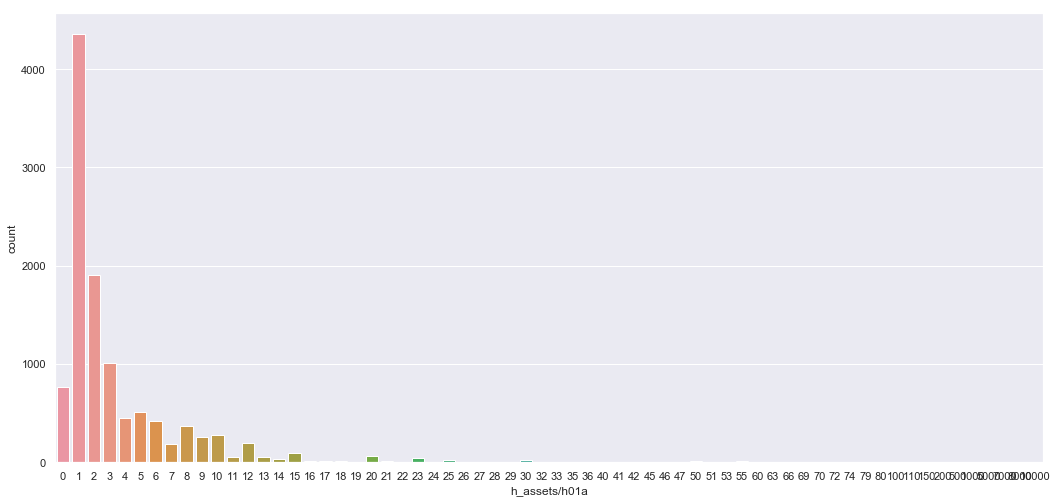

In [97]:
sns.set(style="darkgrid")

sns.set(rc={'figure.figsize':(17.7,8.27)})

ax = sns.countplot(x="h_assets/h01a", data=df_assets)

#### How many of these people actually own the land?

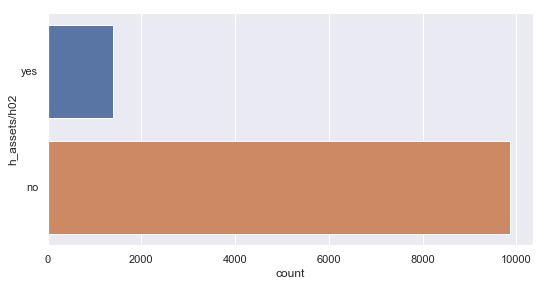

In [98]:
sns.set(rc={'figure.figsize':(8.7,4.27)})
ax = sns.countplot(y="h_assets/h02", data=df_assets)

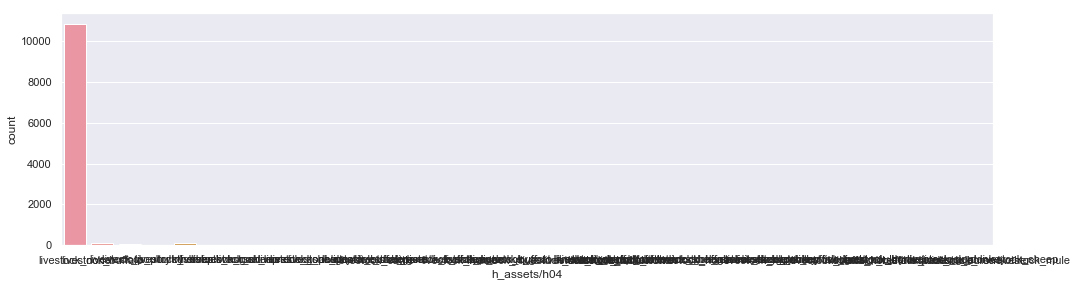

In [99]:
sns.set(rc={'figure.figsize':(16.7,4.27)})
ax = sns.countplot(x="h_assets/h04", data=df_assets)

Weirdly enough, nobody owns livestock.

In [100]:
df_assets = df_assets.rename(columns = {"h_assets/h_dai/h05": "Fridge", 
                                  "h_assets/h_dai/h06":"Stove", 
                                  "h_assets/h_dai/h07": "TV",
                                  "h_assets/h_dai/h08": "Radio",
                                  "h_assets/h_dai/h09": "VCR/DVD",
                                  "h_assets/h_dai/h10": "Mobile",
                                  "h_assets/h_dai/h11": "Computer",
                                  "h_assets/h_dai/h12": "Sewing m/c",
                                  "h_assets/h_dai/h13": "Iron",      
                                  "h_assets/h_dai/h14": "Bicycle",
                                  "h_assets/h_dai/h15": "Motorcycle",
                                  "h_assets/h_dai/h16": "Car", 
                                  "h_assets/h_dai/h17": "Tractor"
                                  }) 
melted_data = pd.melt(df_assets, value_vars=['Fridge', 'Stove', 'TV', 'Radio',
                                                 'VCR/DVD', 'Mobile', 'Computer',
                                                 'Sewing m/c', 'Iron', 'Bicycle',
                                                 'Motorcycle', 'Car', 'Tractor'], 
                      var_name='question', value_name='answer')

melted_data.groupby(by=['question', 'answer'])['answer'].count()

question    answer
Bicycle     no         7683
            yes        3577
Car         no        10124
            yes        1136
Computer    no         9679
            yes        1581
Fridge      no         5807
            yes        5453
Iron        no         3748
            yes        7512
Mobile      no         1753
            yes        9507
Motorcycle  no         8625
            yes        2635
Radio       no         8218
            yes        3042
Sewing m/c  no         5593
            yes        5667
Stove       no         4580
            yes        6680
TV          no         1775
            yes        9485
Tractor     no        11152
            yes         108
VCR/DVD     no         9867
            yes        1393
Name: answer, dtype: int64

In [101]:
df_assets = df_assets.rename(columns = {"h_assets/h18": "Are the basic kitchen items available?", 
                                  "h_assets/h19":"Do all school-aged children have the necessary basic items?", 
                                  "h_assets/h20": "Does every household member have his/her own mattrass?",
                                  "h_assets/h21": "Does every household member have his/her own blanket?",
                                  "h_assets/h22": "Do you have safe water storage containers?",
                                  "h_assets/h23": "Does the household have the necessary basic hygiene items?",
                                  
                                  }) 
melted_data1 = pd.melt(df_assets, value_vars=['Are the basic kitchen items available?',
                                             'Do all school-aged children have the necessary basic items?',
                                             'Does every household member have his/her own mattrass?',
                                             'Does every household member have his/her own blanket?',
                                             'Do you have safe water storage containers?'
                                            ], 
                      var_name='question', value_name='answer')

melted_data1.groupby(by=['question', 'answer'])['answer'].count()

question                                                     answer
Are the basic kitchen items available?                       no        2151
                                                             yes       9109
Do all school-aged children have the necessary basic items?  no        3174
                                                             yes       8086
Do you have safe water storage containers?                   no        4156
                                                             yes       7104
Does every household member have his/her own blanket?        no        3375
                                                             yes       7885
Does every household member have his/her own mattrass?       no        3426
                                                             yes       7834
Name: answer, dtype: int64

# VIII. Adaptive capacity

In [102]:
df_adaptive_capacity.describe()

,i_adaptive/i01,i_adaptive/i01income_count,i_adaptive/i04,i_adaptive/i05a,i_adaptive/i05a1/school_work,i_adaptive/i05a1/school_document,i_adaptive/i05a1/school_far,i_adaptive/i05a1/school_ill,i_adaptive/i05a1/school_useful,i_adaptive/i05a1/school_monet,...,i_adaptive/i05b1/school_monet,i_adaptive/i05b1/school_language,i_adaptive/i05b1/school_allow,i_adaptive/i05b1/other,i_adaptive/i12/a_food,i_adaptive/i12/a_nfi,i_adaptive/i12/a_health,i_adaptive/i12/a_housing,i_adaptive/i12/a_legal,i_adaptive/i12/other
count,11260.000000,11260.000000,11260.000000,2101.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,...,758.000000,758.000000,758.000000,758.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.00000,2929.000000
mean,1.184547,1.184547,8972.138099,0.425988,0.263724,0.060280,0.060280,0.047363,0.156082,0.353068,...,0.389182,0.011873,0.059367,0.186016,0.352680,0.085012,0.290201,0.222943,0.06282,0.475930
std,0.563139,0.563139,13977.223650,0.841128,0.440889,0.238133,0.238133,0.212528,0.363128,0.478181,...,0.487887,0.108388,0.236466,0.389376,0.477886,0.278947,0.453933,0.416291,0.24268,0.499506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,1.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,10000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,9.000000,9.000000,540000.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of people')]

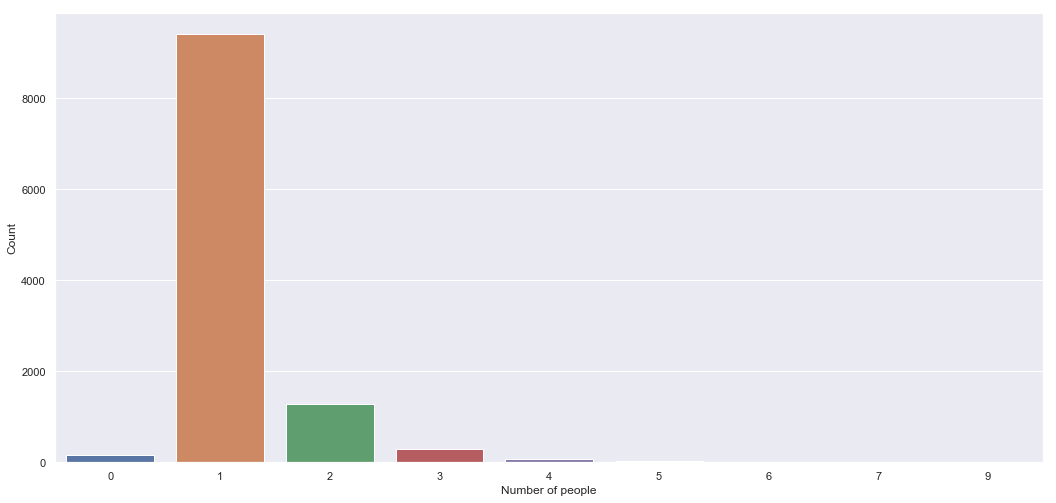

In [103]:
sns.set(style="darkgrid")

sns.set(rc={'figure.figsize':(17.7,8.27)})

ax = sns.countplot(x="i_adaptive/i01", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Number of people')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Average salaries')]

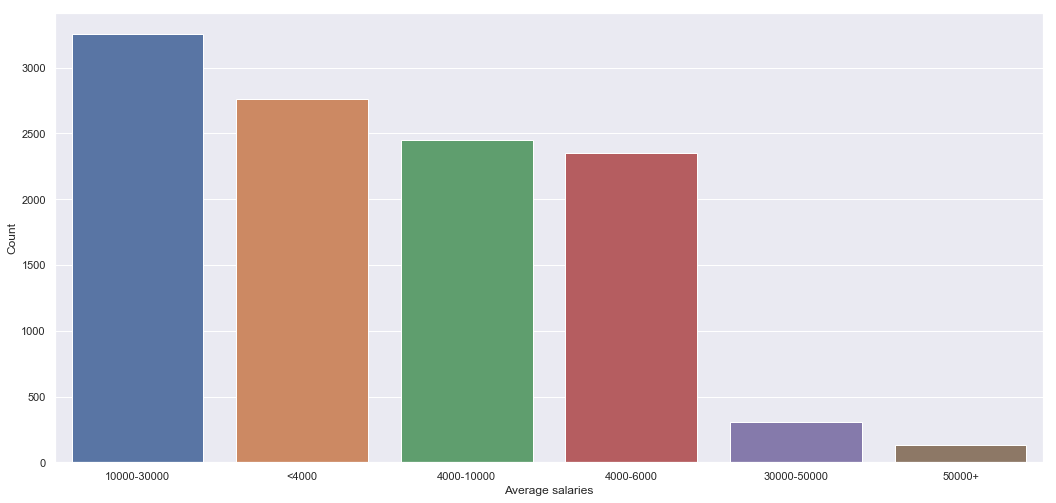

In [104]:
df_adaptive_capacity = df_adaptive_capacity.rename(columns = {"i_adaptive/i04": "Income"})

def income_group(Income):
    
    
    Income = int(Income)
    
    if Income < 4000:
        bucket = '<4000'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if Income in range(4000, 6000):
        bucket = '4000-6000'
        
    if Income in range(6000, 10000):
        bucket = '4000-10000'
        
    if Income in range(10000, 30000):
        bucket = '10000-30000'
        
    if Income in range(30000, 50000):
        bucket = '30000-50000'
    
    if Income >= 50000:
        bucket = '50000+'

    return bucket 

df_adaptive_capacity['income_group'] = df_adaptive_capacity['Income'].apply(income_group)

ax = sns.countplot(x="income_group", data=df_adaptive_capacity, order = df_adaptive_capacity['income_group'].value_counts().index)
ax.set(ylabel='Count', xlabel='Average salaries')

In [105]:
df_adaptive_capacity.describe()

,i_adaptive/i01,i_adaptive/i01income_count,Income,i_adaptive/i05a,i_adaptive/i05a1/school_work,i_adaptive/i05a1/school_document,i_adaptive/i05a1/school_far,i_adaptive/i05a1/school_ill,i_adaptive/i05a1/school_useful,i_adaptive/i05a1/school_monet,...,i_adaptive/i05b1/school_monet,i_adaptive/i05b1/school_language,i_adaptive/i05b1/school_allow,i_adaptive/i05b1/other,i_adaptive/i12/a_food,i_adaptive/i12/a_nfi,i_adaptive/i12/a_health,i_adaptive/i12/a_housing,i_adaptive/i12/a_legal,i_adaptive/i12/other
count,11260.000000,11260.000000,11260.000000,2101.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,...,758.000000,758.000000,758.000000,758.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.00000,2929.000000
mean,1.184547,1.184547,8972.138099,0.425988,0.263724,0.060280,0.060280,0.047363,0.156082,0.353068,...,0.389182,0.011873,0.059367,0.186016,0.352680,0.085012,0.290201,0.222943,0.06282,0.475930
std,0.563139,0.563139,13977.223650,0.841128,0.440889,0.238133,0.238133,0.212528,0.363128,0.478181,...,0.487887,0.108388,0.236466,0.389376,0.477886,0.278947,0.453933,0.416291,0.24268,0.499506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,1.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,10000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,9.000000,9.000000,540000.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


[Text(0, 0.5, 'Are the children going to schoool?'), Text(0.5, 0, 'Count')]

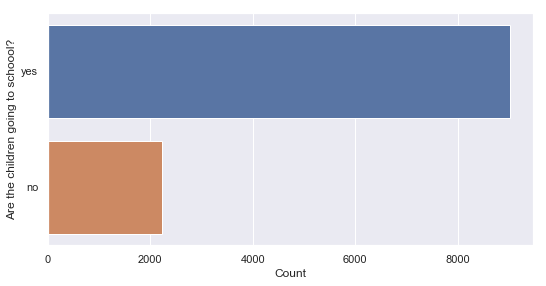

In [106]:
sns.set(rc={'figure.figsize':(8.7,4.27)})
ax = sns.countplot(y="i_adaptive/i05", data=df_adaptive_capacity)
ax.set(ylabel='Are the children going to schoool?', xlabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of girls attending school')]

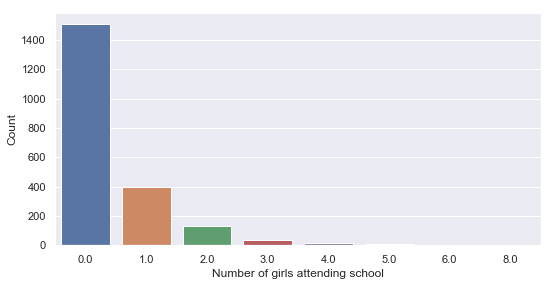

In [107]:
ax = sns.countplot(x="i_adaptive/i05a", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Number of girls attending school')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of boys attending school')]

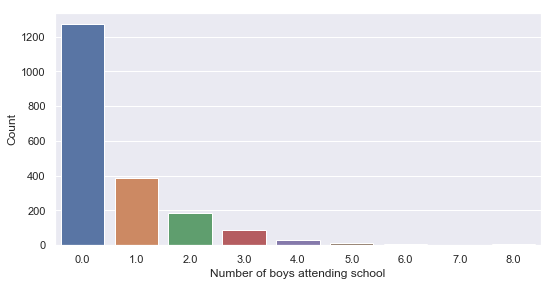

In [108]:
ax = sns.countplot(x="i_adaptive/i05b", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Number of boys attending school')

INCOME EXPENSE ON FOOD

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Order of expense')]

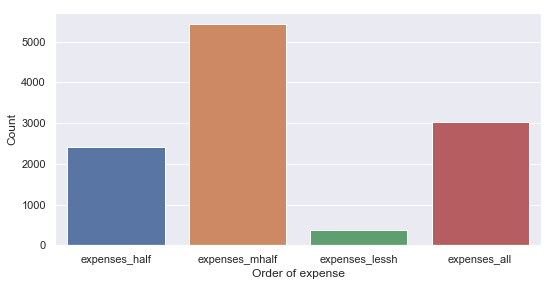

In [109]:
ax = sns.countplot(x="i_adaptive/i06", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Order of expense')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much of your family income is spent on fuel and heating?')]

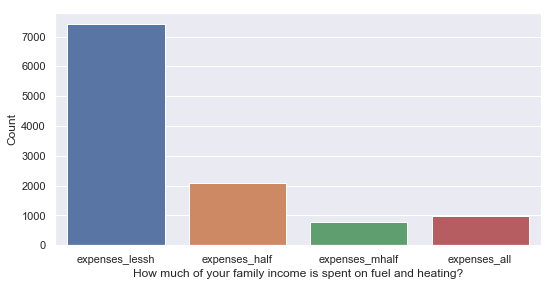

In [110]:
ax = sns.countplot(x="i_adaptive/i07", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much of your family income is spent on fuel and heating?')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much does the family spend daily to go to work?')]

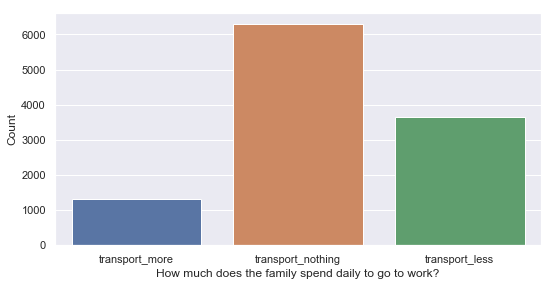

In [111]:
ax = sns.countplot(x="i_adaptive/i08", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much does the family spend daily to go to work?')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much is your family able to save per month?')]

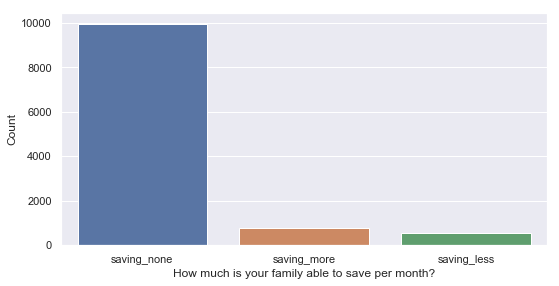

In [112]:
ax = sns.countplot(x="i_adaptive/i09", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much is your family able to save per month?')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much is your families present debt in total?')]

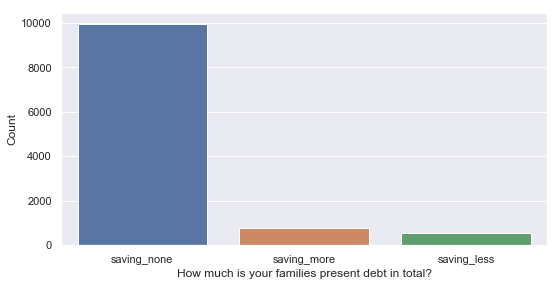

In [113]:
ax = sns.countplot(x="i_adaptive/i09", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much is your families present debt in total?')

# IX. Stereotypes

In [127]:
df_stereotypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 30 columns):
j_stereotypes/j01                     6072 non-null object
j_stereotypes/j02                     6072 non-null object
j_stereotypes/j02/source_own          6072 non-null float64
j_stereotypes/j02/source_fam          6072 non-null float64
j_stereotypes/j02/source_neigh        6072 non-null float64
j_stereotypes/j02/source_elders       6072 non-null float64
j_stereotypes/j02/source_officials    6072 non-null float64
j_stereotypes/j02/source_radio        6072 non-null float64
j_stereotypes/j02/source_tv           6072 non-null float64
j_stereotypes/j02/source_paper        6072 non-null float64
j_stereotypes/j02/source_internet     6072 non-null float64
j_stereotypes/j02/other               6072 non-null float64
j_stereotypes/j02_other               624 non-null object
j_stereotypes/j03                     6072 non-null object
j_stereotypes/j03/source_own          6072 non-null floa

In [128]:
df_stereotypes['city'] = df['City']

In [130]:
df_stereotypes.columns

Index(['j_stereotypes/j01', 'j_stereotypes/j02',
       'j_stereotypes/j02/source_own', 'j_stereotypes/j02/source_fam',
       'j_stereotypes/j02/source_neigh', 'j_stereotypes/j02/source_elders',
       'j_stereotypes/j02/source_officials', 'j_stereotypes/j02/source_radio',
       'j_stereotypes/j02/source_tv', 'j_stereotypes/j02/source_paper',
       'j_stereotypes/j02/source_internet', 'j_stereotypes/j02/other',
       'j_stereotypes/j02_other', 'j_stereotypes/j03',
       'j_stereotypes/j03/source_own', 'j_stereotypes/j03/source_fam',
       'j_stereotypes/j03/source_neigh', 'j_stereotypes/j03/source_elders',
       'j_stereotypes/j03/source_officials', 'j_stereotypes/j03/source_radio',
       'j_stereotypes/j03/source_tv', 'j_stereotypes/j03/source_paper',
       'j_stereotypes/j03/source_internet', 'j_stereotypes/j03/other',
       'j_stereotypes/j03_other', 'j_stereotypes/j0',
       'j_stereotypes/j0/stigma_pasht', 'j_stereotypes/j0/stigma_taliban',
       'j_stereotypes/j0/stig

In [129]:
#plotting

idp_herat = df_stereotypes[df_stereotypes['city']=='herat'][df_stereotypes['j_stereotypes/j01']=='idp_idp']['j_stereotypes/j01'].count()
host_family_herat = df_stereotypes[df_stereotypes['city']=='herat'][df_stereotypes['j_stereotypes/j01']=='idp_host']['j_stereotypes/j01'].count()
comm_member_herat = df_stereotypes[df_stereotypes['city']=='herat'][df_stereotypes['j_stereotypes/j01']=='idp_comm']['j_stereotypes/j01'].count()

idp_jalalabad = df_stereotypes[df_stereotypes['city']=='jalalabad'][df_stereotypes['j_stereotypes/j01']=='idp_idp']['j_stereotypes/j01'].count()
host_family_jalalabad = df_stereotypes[df_stereotypes['city']=='jalalabad'][df_stereotypes['j_stereotypes/j01']=='idp_host']['j_stereotypes/j01'].count()
comm_member_jalalabad = df_stereotypes[df_stereotypes['city']=='jalalabad'][df_stereotypes['j_stereotypes/j01']=='idp_comm']['j_stereotypes/j01'].count()


trace_herat = go.Bar(
    x=['IDPs', 'Host family', 'Community member'],
    y=[idp_herat, host_family_herat, comm_member_herat],
    name='Herat')

trace_jalalabad = go.Bar(
    x=['IDPs', 'Host family', 'Community member'],
    y=[idp_jalalabad, host_family_jalalabad, comm_member_jalalabad],
    name='Jalalabad')

data = [trace_herat, trace_jalalabad]

layout = go.Layout(
    title='To which category does the family belong?',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [131]:
j = ['source_own', 'source_fam',
       'source_neigh', 'source_elders',
       'source_officials', 'source_radio',
       'source_tv', 'source_paper',
       'source_internet', 'other']
j02 = ['j_stereotypes/j02/' + x for x in j]

In [132]:
res = df_stereotypes[j02].sum()

In [133]:
res

j_stereotypes/j02/source_own           772.0
j_stereotypes/j02/source_fam          1927.0
j_stereotypes/j02/source_neigh        2107.0
j_stereotypes/j02/source_elders       1729.0
j_stereotypes/j02/source_officials     647.0
j_stereotypes/j02/source_radio         660.0
j_stereotypes/j02/source_tv           2813.0
j_stereotypes/j02/source_paper          82.0
j_stereotypes/j02/source_internet       36.0
j_stereotypes/j02/other                624.0
dtype: float64

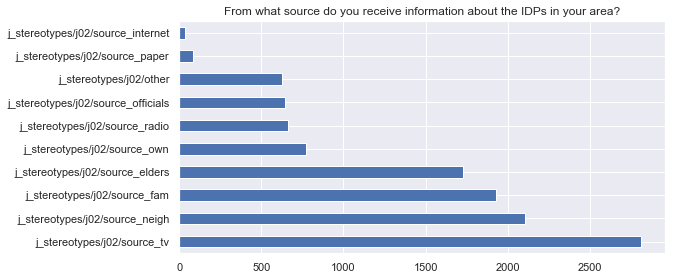

In [134]:
res.sort_values(ascending=False, inplace=True)
res.plot(kind='barh', title = 'From what source do you receive information about the IDPs in your area?')

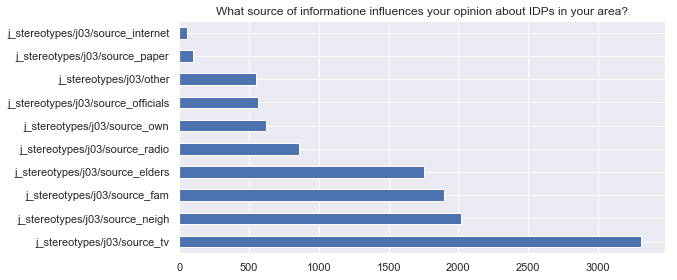

In [135]:
j03 = ['j_stereotypes/j03/' + x for x in j]
res = df_stereotypes[j03].sum()
res.sort_values(ascending=False, inplace=True)
res.plot(kind='barh', title = 'What source of informatione influences your opinion about IDPs in your area?')

In [136]:
#j0 TBD

# X. Interest to participate in the program

In [119]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
k_interest/k01                                11260 non-null object
k_interest/k_participate/k_note               0 non-null float64
k_interest/k_participate/k_label              0 non-null float64
k_interest/k_participate/k_label/ben_women    0 non-null float64
k_interest/k_participate/k_label/ben_men      0 non-null float64
k_interest/k_participate/k02                  5137 non-null object
k_interest/k_participate/k02/ben_women        5137 non-null float64
k_interest/k_participate/k02/ben_men          5137 non-null float64
k_interest/k_participate/k03                  7306 non-null object
k_interest/k_participate/k03/ben_women        7306 non-null float64
k_interest/k_participate/k03/ben_men          7306 non-null float64
k_interest/k_participate/k04                  8926 non-null object
k_interest/k_participate/k04/ben_women        8926 non-null float64
k_interest/k_participa

In [120]:
df_interest['city'] = df['City']

In [121]:
df_interest.columns

Index(['k_interest/k01', 'k_interest/k_participate/k_note',
       'k_interest/k_participate/k_label',
       'k_interest/k_participate/k_label/ben_women',
       'k_interest/k_participate/k_label/ben_men',
       'k_interest/k_participate/k02',
       'k_interest/k_participate/k02/ben_women',
       'k_interest/k_participate/k02/ben_men', 'k_interest/k_participate/k03',
       'k_interest/k_participate/k03/ben_women',
       'k_interest/k_participate/k03/ben_men', 'k_interest/k_participate/k04',
       'k_interest/k_participate/k04/ben_women',
       'k_interest/k_participate/k04/ben_men', 'k_interest/k_participate/k05',
       'k_interest/k_participate/k05/ben_women',
       'k_interest/k_participate/k05/ben_men', 'city'],
      dtype='object')

In [122]:
#plotting interest data

yes_herat = df_interest[df_interest['city']=='herat'][df_interest['k_interest/k01']=='yes']['k_interest/k01'].count()
yes_jalalabad = df_interest[df_interest['city']=='jalalabad'][df_interest['k_interest/k01']=='yes']['k_interest/k01'].count()
no_herat = df_interest[df_interest['city']=='herat'][df_interest['k_interest/k01']=='no']['k_interest/k01'].count()
no_jalalabad = df_interest[df_interest['city']=='jalalabad'][df_interest['k_interest/k01']=='no']['k_interest/k01'].count()

trace_herat = go.Bar(
    x=['YES', 'NO'],
    y=[yes_herat, no_herat],
    name='Herat')

trace_jalalabad = go.Bar(
    x=['YES', 'NO'],
    y=[yes_jalalabad, no_jalalabad],
    name='Jalalabad')

data = [trace_herat, trace_jalalabad]

layout = go.Layout(
    title='Interest to participate in the program',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [123]:
# k02: interest of participation in Self-help and learning groups (ratio in % TBD)

In [124]:
# plotting
k02_herat = df_interest[df_interest['city']=='herat']['k_interest/k_participate/k02'].value_counts()
k02_jalalabad = df_interest[df_interest['city']=='jalalabad']['k_interest/k_participate/k02'].value_counts()

trace_herat = go.Bar(
    x=['Women', 'Men', 'Women and Men'],
    y=[k02_herat['ben_women'], k02_herat['ben_men'], k02_herat['ben_women ben_men']],
    name='Herat')

trace_jalalabad = go.Bar(
    x=['Women', 'Men', 'Women and Men'],
    y=[k02_jalalabad['ben_women'], k02_jalalabad['ben_men'], k02_jalalabad['ben_women ben_men']],
    name='Jalalabad')

data = [trace_herat, trace_jalalabad]

layout = go.Layout(
    title='Interest to participate in Self-help and learning groups',
    yaxis=dict(
        title='<i>Number of households</i>'),
    xaxis=dict(
        title='<i>Agreed for participation</i>'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grouped-bar')

In [125]:
#k03: Literacy Trainings

In [126]:
k03_herat = df_interest[df_interest['city']=='herat']['k_interest/k_participate/k03'].value_counts()
k03_jalalabad = df_interest[df_interest['city']=='jalalabad']['k_interest/k_participate/k03'].value_counts()

trace_herat = go.Bar(
    x=['Women', 'Men', 'Women and Men'],
    y=[k03_herat['ben_women'], k03_herat['ben_men'], k03_herat['ben_women ben_men']],
    name='Herat')

trace_jalalabad = go.Bar(
    x=['Women', 'Men', 'Women and Men'],
    y=[k03_jalalabad['ben_women'], k03_jalalabad['ben_men'], k03_jalalabad['ben_women ben_men']],
    name='Jalalabad')

data = [trace_herat, trace_jalalabad]

layout = go.Layout(
    title='Interest to participate in Literacy Trainings',
    yaxis=dict(
        title='<i>Number of households</i>'),
    xaxis=dict(
        title='<i>Agreed for participation</i>'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grouped-bar')

In [137]:
#k04, k05 TBD